# Text Normalization Data

Here  is a simple EDA of Text normalization data from Gooodle's kaggle competition. 

In [55]:
# import the important libraries/packages
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import nltk
import seaborn as sns

In [95]:
# load the train dataset
dataset = pd.read_csv('text-normalization\\en_train.csv')

In [96]:
# load the test dataset
test_data = pd.read_csv('text-normalization\\en_test.csv')

In [97]:
len(dataset)

9918441

In [114]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9918441 entries, 0 to 9918440
Data columns (total 5 columns):
sentence_id    int64
token_id       int64
class          object
before         object
after          object
dtypes: int64(2), object(3)
memory usage: 378.4+ MB


In [115]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1088564 entries, 0 to 1088563
Data columns (total 3 columns):
sentence_id    1088564 non-null int64
token_id       1088564 non-null int64
before         1088556 non-null object
dtypes: int64(2), object(1)
memory usage: 24.9+ MB


**NOTE: There is no 'class' and 'after' columns in Test data**

In [117]:
# Columns of the test DATASET
test_data.columns

Index(['sentence_id', 'token_id', 'before'], dtype='object')

In [118]:
# Columns of the Train DATASET
dataset.columns

Index(['sentence_id', 'token_id', 'class', 'before', 'after'], dtype='object')

**A few other statistics of the datasets**

In [119]:
dataset.describe()

,sentence_id,token_id
count,9.918441e+06,9.918441e+06
mean,3.778565e+05,7.519584e+00
std,2.151371e+05,6.117934e+00
min,0.000000e+00,0.000000e+00
25%,1.925260e+05,3.000000e+00
50%,3.792590e+05,6.000000e+00
75%,5.641890e+05,1.100000e+01
max,7.480650e+05,2.550000e+02


In [120]:
test_data.describe()

,sentence_id,token_id
count,1.088564e+06,1.088564e+06
mean,3.500687e+04,8.343651e+00
std,2.021462e+04,6.536760e+00
min,0.000000e+00,0.000000e+00
25%,1.748800e+04,3.000000e+00
50%,3.502800e+04,7.000000e+00
75%,5.252200e+04,1.200000e+01
max,6.999900e+04,2.480000e+02


In [100]:
# brief view of TRAIN DATA
dataset.head()

,sentence_id,token_id,class,before,after
0,0,0,PLAIN,Brillantaisia,Brillantaisia
1,0,1,PLAIN,is,is
2,0,2,PLAIN,a,a
3,0,3,PLAIN,genus,genus
4,0,4,PLAIN,of,of


In [109]:
# brief view of TEST DATA
test_data.head()

,sentence_id,token_id,before
0,0,0,Another
1,0,1,religious
2,0,2,family
3,0,3,is
4,0,4,of


## TRAINING DATASET

**There are 16 different classes in the training data**

In [101]:
# CLASSES OF TRAINING DATA
print(set(dataset['class']))
print("Total number of classes: ", len(set(dataset['class'])))

{'PUNCT', 'ORDINAL', 'DATE', 'DIGIT', 'MEASURE', 'VERBATIM', 'PLAIN', 'ADDRESS', 'MONEY', 'TIME', 'FRACTION', 'DECIMAL', 'TELEPHONE', 'CARDINAL', 'LETTERS', 'ELECTRONIC'}
Total number of classes:  16


In [106]:
# Missing values in train data
dataset.isnull().values.sum()

97

In [29]:
# total Number of unique sentences 
len(dataset.sentence_id.unique())


748066

In [122]:
# total number of unique tokens
len(dataset.token_id.unique())

256

In [121]:
# Item counts for each class
count_classes = dataset.groupby("class")["class"].count().sort_values(ascending=False)
print(count_classes)

class
PLAIN         7353693
PUNCT         1880507
DATE           258348
LETTERS        152795
CARDINAL       133744
VERBATIM        78108
MEASURE         14783
ORDINAL         12703
DECIMAL          9821
MONEY            6128
DIGIT            5442
ELECTRONIC       5162
TELEPHONE        4024
TIME             1465
FRACTION         1196
ADDRESS           522
Name: class, dtype: int64


**Most of the data belong to the plain text class** 
A visulization of the counts:

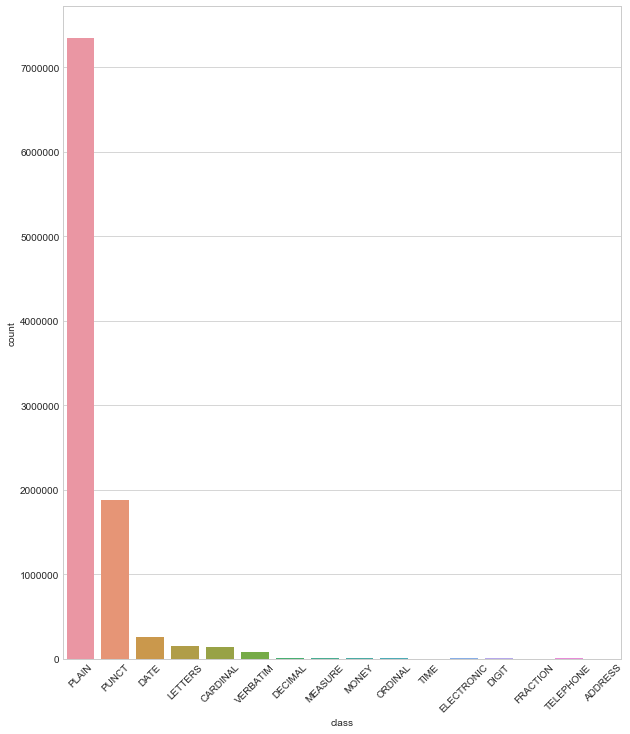

In [56]:
fig, ax = plt.subplots(1,1, figsize=(10,12))
sns.set_style("whitegrid")
count_classes_plot = sns.countplot("class", data=dataset, ax=ax)
for item in count_classes_plot.get_xticklabels():
    item.set_rotation(45)

**Observation** 

Closely related classes: 'DIGIT', 'DECIMAL', 'CARDINAL', 'FRACTION' 

There is a chance of overlapping.

**Few Samples of Different Class Items and Their Frquency**

In [85]:
for word in set(dataset["class"]):
    print("Most frequent ", word," CLASS Examples: ")
    print(dataset[dataset["class"]== word].groupby("before")["before"].count().sort_values(ascending=False)[:3])
    print("_______________________________________________")
    

Most frequent  PUNCT  CLASS Examples: 
before
.    749454
,    466876
"    267301
Name: before, dtype: int64
_______________________________________________
Most frequent  ORDINAL  CLASS Examples: 
before
2nd    1020
1st     824
3rd     668
Name: before, dtype: int64
_______________________________________________
Most frequent  DATE  CLASS Examples: 
before
2010    4629
2006    4466
2007    4048
Name: before, dtype: int64
_______________________________________________
Most frequent  DIGIT  CLASS Examples: 
before
2    386
1    298
3    218
Name: before, dtype: int64
_______________________________________________
Most frequent  MEASURE  CLASS Examples: 
before
50%    120
80%     91
40%     91
Name: before, dtype: int64
_______________________________________________
Most frequent  VERBATIM  CLASS Examples: 
before
-     11889
&      9684
pp     3932
Name: before, dtype: int64
_______________________________________________
Most frequent  PLAIN  CLASS Examples: 
before
the    370393
o

**Number of elements changed after the normalization**

In [135]:
len(dataset[dataset.before != dataset.after])

659839

**Most Changed Words**

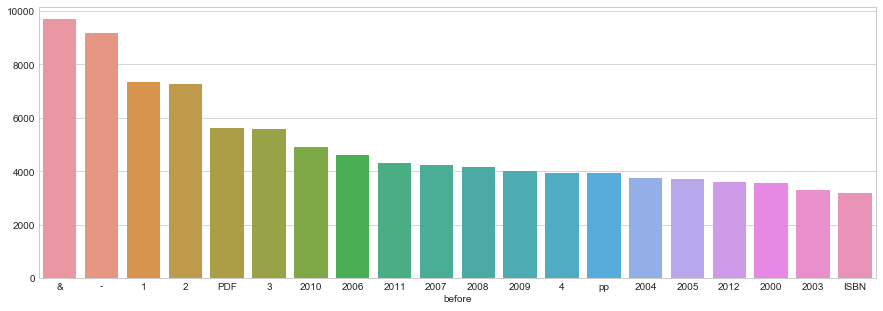

In [137]:
most_changed_words = dataset[dataset.before != dataset.after].groupby("before")["before"].count().sort_values(ascending=False).head(20)
fig, ax = plt.subplots(1,1,figsize=(15,5))
sns.barplot(x=most_changed_words.index, y=most_changed_words.values)

**Plot of changes in different classes**

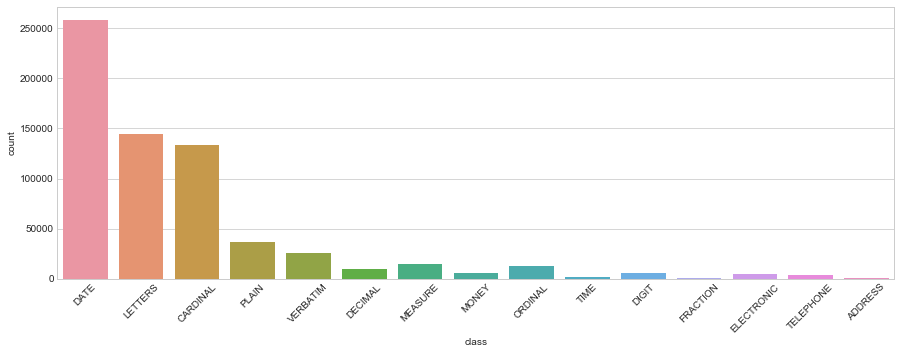

In [139]:
fig, ax = plt.subplots(1,1,figsize=(15,5))
changes_classes_fig = sns.countplot(x="class", data=dataset[dataset.before != dataset.after])
for item in changes_classes_fig.get_xticklabels():
    item.set_rotation(45)